In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit as lm

In [5]:
data = pd.read_excel("9_18_21 Exp Compiled Data (Pos0-65)2.xlsx",sheet_name="Filtered")
data

,Light,Time,8_1,65_1,65_3,64_3,64_6,34_2,34_4,9_3,9_4,15_6,16_5
0,0 (off),0.000000,58384,68084,60780,69212,70916,98032,73416,63932,37148,44548,66372
1,0,0.333334,55236,67660,58960,70464,71756,97464,77060,66560,34304,44068,68144
2,0,0.666667,56000,67664,62092,68040,70324,96108,76108,66280,34940,45068,70196
3,0,1.000000,55248,67720,60656,69296,70464,97520,74552,67980,31820,44740,69740
4,0,1.333336,56380,68160,59724,68628,69804,99172,76900,67160,33292,45716,72408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,56.666780,160856,283188,209044,255300,243104,289328,290052,129560,128044,153524,249696
171,1,57.000114,160172,285240,207900,256980,244304,293868,293624,128644,127520,154144,249996
172,1,57.333448,159272,281740,208976,255252,244376,300712,292668,128496,126880,154428,252400
173,1,57.666782,158472,281328,208356,254748,246136,304464,291352,129340,128000,155540,250348


In [14]:
col = list(data.columns)
col.remove('Light')
col.remove('Time')
col

['8_1',
 '65_1',
 '65_3',
 '64_3',
 '64_6',
 '34_2',
 '34_4',
 '9_3',
 '9_4',
 '15_6',
 '16_5']

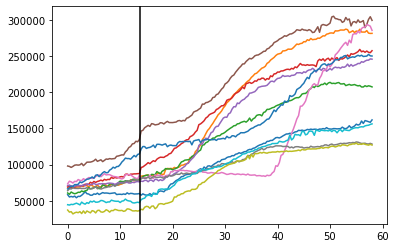

In [15]:
time = data["Time"]
for idx in col:
    plt.plot(time,data[idx])
plt.axvline(x=13.77,color="k")

In [18]:
datanp = data.to_numpy()[:,2:].astype('float64')
datanp

array([[ 58384.,  68084.,  60780., ...,  37148.,  44548.,  66372.],
       [ 55236.,  67660.,  58960., ...,  34304.,  44068.,  68144.],
       [ 56000.,  67664.,  62092., ...,  34940.,  45068.,  70196.],
       ...,
       [159272., 281740., 208976., ..., 126880., 154428., 252400.],
       [158472., 281328., 208356., ..., 128000., 155540., 250348.],
       [161784., 281432., 207420., ..., 126968., 156292., 250104.]])

In [19]:
data_mean = np.mean(datanp,axis=1)
data_std = np.std(datanp,axis=1)
data_mean.size

175

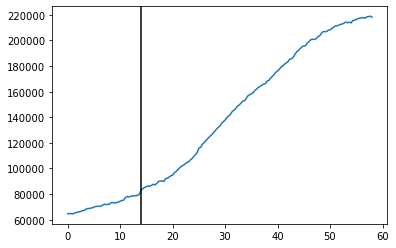

In [20]:
plt.plot(time,data_mean)
plt.axvline(x=14.0,color="k")

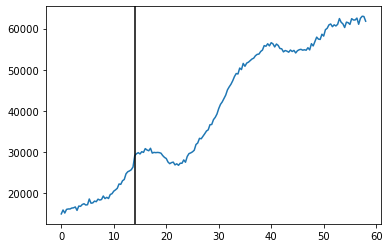

In [21]:
plt.plot(time,data_std)
plt.axvline(x=14.0,color="k")

In [22]:
data_ill = data[data['Time']>13.33]
time_ill = data_ill["Time"]-13.67
data_illnp = data_ill.to_numpy()[:,2:].astype('float64')
data_illnp

array([[ 59532.,  77508.,  79780., ...,  35728.,  48000., 114020.],
       [ 60020.,  77844.,  79916., ...,  36380.,  47388., 114848.],
       [ 57740.,  83932.,  80296., ...,  38280.,  51592., 121528.],
       ...,
       [159272., 281740., 208976., ..., 126880., 154428., 252400.],
       [158472., 281328., 208356., ..., 128000., 155540., 250348.],
       [161784., 281432., 207420., ..., 126968., 156292., 250104.]])

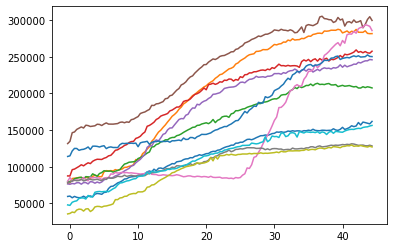

In [23]:
for idx in col:
    plt.plot(time_ill,data_ill[idx])


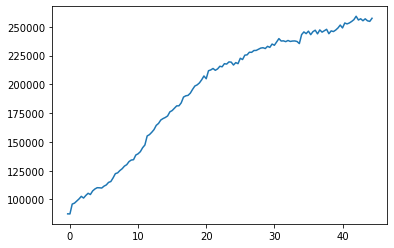

In [38]:
datay = data_illnp[:,3]
noise = np.sqrt(np.abs(datay))
plt.plot(time_ill,datay)

In [26]:
def DE(t, m, k, beta, delta,offset):
    """General expression model function"""

    f1 = np.exp(- (beta + k) * t) / (beta - delta + k)
    f2 = - np.exp(- beta * t) / (beta - delta)
    f3 = k * np.exp(- delta * t) / (beta - delta) / (beta - delta + k)

    f = (f1 + f2 + f3) * m

    return f + offset

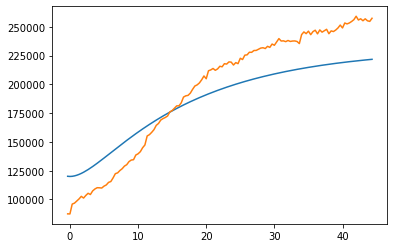

In [39]:
m_ktl_0 = 8e3

tr_0 = 4.5
kmr_0 = 0.3
betr_0 = 0.06
deltr_0 = 0.0
offr_0 = 120000

y1 = DE(time_ill,m_ktl_0,kmr_0,betr_0,deltr_0,offr_0)
plt.plot(time_ill,y1)
plt.plot(time_ill,datay)
#print(t,y)

In [40]:
DE_model = lm.Model(DE)
pars = DE_model.make_params()
pars['m'].set(value=m_ktl_0,vary=True)
pars['k'].set(value=kmr_0,vary=False)
pars['beta'].set(value=betr_0,vary=True)
pars['delta'].set(value=deltr_0,vary=False)
pars['offset'].set(value=offr_0,vary=True)

out = DE_model.fit(datay, pars, t=time_ill, weights=1/noise)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(DE)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 135
    # variables        = 3
    chi-square         = 14925.8699
    reduced chi-square = 113.074772
    Akaike info crit   = 641.252820
    Bayesian info crit = 649.968644
[[Variables]]
    m:       11146.5796 +/- 274.908139 (2.47%) (init = 8000)
    k:       0.3 (fixed)
    beta:    0.04939158 +/- 0.00150064 (3.04%) (init = 0.06)
    delta:   0 (fixed)
    offset:  91170.7551 +/- 868.020463 (0.95%) (init = 120000)
[[Correlations]] (unreported correlations are < 0.250)
    C(m, beta)      =  0.961
    C(m, offset)    = -0.760
    C(beta, offset) = -0.600


Text(0, 0.5, '# of GFP')

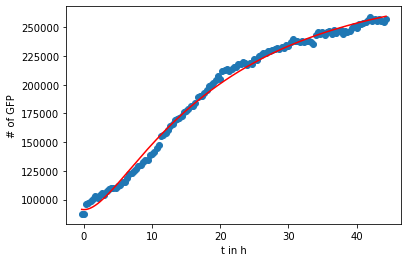

In [41]:
plt.plot(time_ill,datay,"o")
plt.plot(time_ill, out.best_fit, 'r-')
plt.xlabel("t in h")
plt.ylabel("# of GFP")
#plt.savefig("lq-fitted.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")